In [1]:
from cleaning_data import cleaning_data
from import_data import import_data
from vectorize_data import vectorize_data
from topic_model import topic_model
from unique_terms import unique_terms
from bar_graph import bar_graph
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
%load_ext autoreload
%autoreload 2

## Self Summary

In [3]:
df_self=import_data('selfsummary')
corpus = df_self['selfsummary']
words_remove=['bay','area','san','francisco','sf','also','like','good','student','college','graduate','guy','girl','man','woman','mom','dad','uc','berkeley','stanford','school']
clean_corpus = cleaning_data(corpus,('J','V','N'),words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=50,max_df=.2, ngram_range=(2,2))
nmf_model = NMF(5,random_state=1)
topic_model(nmf_model, X, terms_per_topic=8);


Topic  1
['easy go', 'get know', 'love travel', 'friend family', 'open mind', 'spending time', 'born raise', 'love laugh']

Topic  2
['meet new', 'new people', 'look meet', 'love meet', 'new friend', 'enjoy meet', 'new place', 'people make']

Topic  3
['new thing', 'try new', 'learn new', 'love try', 'new place', 'new restaurant', 'thing love', 'explore new']

Topic  4
['sense humor', 'great sense', 'humor love', 'love laugh', 'sarcastic sense', 'dry sense', 'meet someone', 'open mind']

Topic  5
['look someone', 'someone share', 'find someone', 'life look', 'make laugh', 'meet someone', 'someone fun', 'someone want']


In [4]:
scores=unique_terms(X, df_self, 'sex')
top=scores.head(15)['scaled_f_score']
bottom=scores.tail(15)['scaled_f_score'].sort_values(ascending=True)

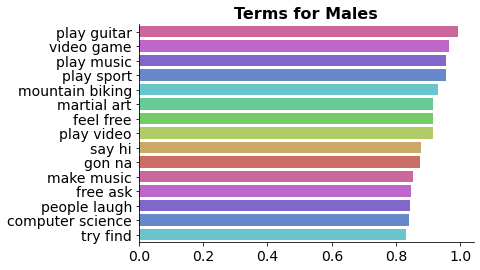

In [6]:
bar_graph(top,'Terms for Males','summarymale.png',True)

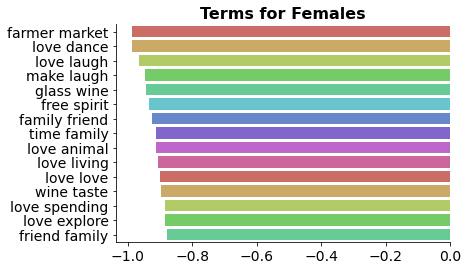

In [7]:
bar_graph(bottom,'Terms for Females','summaryfemale.png')

## Message Me

In [10]:
df_message=import_data('messageme')
corpus = df_message['messageme']
words_remove=['bay','area','san','francisco','sf','thing','things','think','might','like','look','looking']
clean_corpus = cleaning_data(corpus,False,words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=46,max_df=1.0, ngram_range=(2,2))
nmf_model = NMF(6,random_state=1)
doc_topic_nmf,_= topic_model(nmf_model, X, terms_per_topic=3)


Topic  1
['get know', 'want get', 'know well']

Topic  2
['sense humor', 'good sense', 'great sense']

Topic  3
['new friend', 'make new', 'meet new']

Topic  4
['want go', 'bike ride', 'go hike']

Topic  5
['want meet', 'meet someone', 'someone new']

Topic  6
['open mind', 'want know', 'get along']


In [11]:
scores=unique_terms(X, df_message, 'bi_age_group')
top=scores.head(10)['scaled_f_score']
bottom=scores.tail(10)['scaled_f_score'].sort_values(ascending=True)

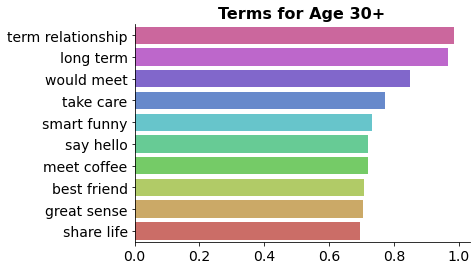

In [12]:
bar_graph(top,'Terms for Age 30+','messageold.png',True)

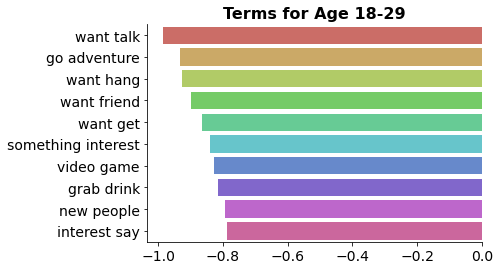

In [14]:
bar_graph(bottom,'Terms for Age 18-29','messageyoung.png')

## I'm good at

In [16]:
df=import_data('goodat')
corpus = df['goodat']
words_remove=['bay','area','san','francisco','sf','also','like','good','make','making','new']
clean_corpus = cleaning_data(corpus,('N','V','J'),words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=20,max_df=1.0, ngram_range=(2,2))
nmf_model = NMF(6,random_state=1)
doc_topic_nmf,_=topic_model(nmf_model, X, terms_per_topic=3)


Topic  1
['people laugh', 'laugh people', 'laugh feel']

Topic  2
['people feel', 'feel comfortable', 'feel ease']

Topic  3
['take care', 'care people', 'care others']

Topic  4
['fix thing', 'thing fix', 'thing work']

Topic  5
['video game', 'play video', 'board game']

Topic  6
['listen people', 'problem solve', 'lot thing']


In [17]:
doc_topic_nmf=np.delete(doc_topic_nmf,5,1)

In [18]:
#Shift towards helping people, caring for people as they get older
top_topic=np.argmax(doc_topic_nmf,axis=1)+1
df_combined=pd.concat([pd.DataFrame(top_topic, columns=['top_topic']),df['age_group']],axis=1)
crosstab=pd.crosstab(columns=df_combined['top_topic'], index=df_combined['age_group'],normalize='index').round(3)*100
crosstab=crosstab.reset_index()
crosstab.columns=['age_group','Making People Laugh','Making People Comfortable','Caring for People','Fixing and Problem Solving','Video and Board Games']
crosstab=crosstab.melt(id_vars=["age_group"],var_name="Topic",value_name="Value")

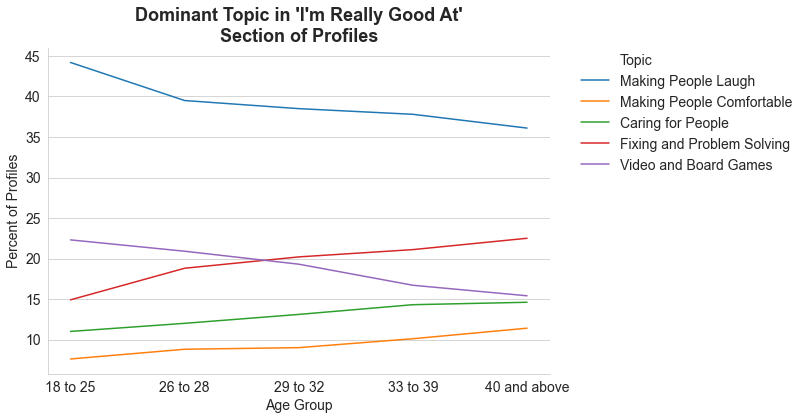

In [19]:
plt.figure(figsize=(9,6))
sns.set_style(style="whitegrid")
ax=sns.lineplot(x=[1,2,3,4,5]*5,y='Value',hue='Topic',data=crosstab)
plt.ylabel('Percent of Profiles',size=14)
plt.xlabel('Age Group',size=14)
plt.title("Dominant Topic in 'I'm Really Good At'\nSection of Profiles", size=18, fontweight='bold')
xticks=['18 to 25','26 to 28','29 to 32','33 to 39','40 and above']
plt.xticks([1,2,3,4,5],xticks,size=14)
plt.yticks(size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 14},frameon=False)
ax.xaxis.grid()
sns.despine()
plt.savefig('topic.png',bbox_inches='tight')


In [20]:
scores=unique_terms(X, df, 'bi_age_group')
top=scores.head(10)['scaled_f_score']
bottom=scores.tail(10)['scaled_f_score'].sort_values(ascending=True)

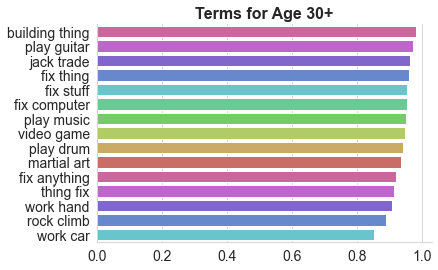

In [31]:
bar_graph(top,'Terms for Age 30+','goodatold.png',True)

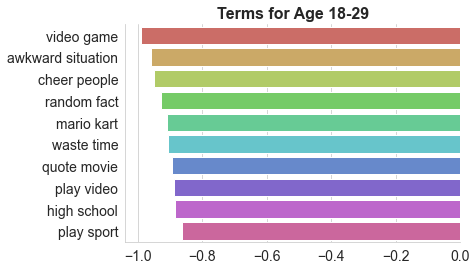

In [23]:
bar_graph(bottom,'Terms for Age 18-29','goodatyoung.png')

In [25]:
scores=unique_terms(X, df, 'sex')
top=scores.head(15)['scaled_f_score']
bottom=scores.tail(15)['scaled_f_score'].sort_values(ascending=True)

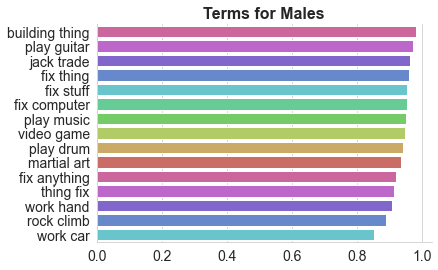

In [26]:
bar_graph(top,'Terms for Males','termmen.png',True)

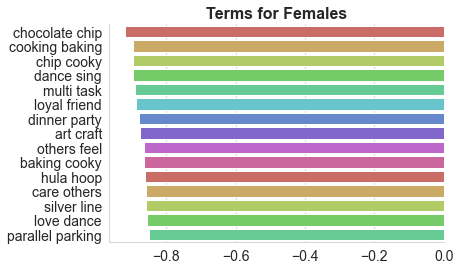

In [28]:
bar_graph(bottom,'Terms for Females','termfemale.png')

## First thing notice

In [33]:
#Use for age
df_notice=import_data('firstnotice')
corpus = df_notice['firstnotice']
words_remove=['bay','area','san','francisco','sf','notice','people','im',"i'm",'lol','haha','age','thing','think','told','guess','girl','point','fact','awesome']
clean_corpus = cleaning_data(corpus,('N'),words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=50,max_df=1.0, ngram_range=(1,1))
nmf_model = NMF(7,random_state=1)
doc_topic_nmf,_=topic_model(nmf_model, X, terms_per_topic=4)


Topic  1
['smile', 'personality', 'energy', 'lot']

Topic  2
['eye', 'blue', 'brown', 'color']

Topic  3
['hair', 'color', 'blonde', 'height']

Topic  4
['look', 'face', 'someone', 'guy']

Topic  5
['sense', 'humor', 'dry', 'personality']

Topic  6
['laugh', 'love', 'loud', 'funny']

Topic  7
['lot', 'time', 'tall', 'tell']


In [34]:
doc_topic_nmf=np.delete(doc_topic_nmf,6,1)

In [35]:
top_topic=np.argmax(doc_topic_nmf,axis=1)+1
df_combined=pd.concat([pd.DataFrame(top_topic, columns=['top_topic']),df_notice['age_group']],axis=1)
crosstab=pd.crosstab(columns=df_combined['top_topic'], index=df_combined['age_group'],normalize='index').round(3)*100
crosstab=crosstab.reset_index()
crosstab.columns=['age_group','Smile and Personality','Eyes','Hair','Face','Sense of Humor','Laugh and Voice']
crosstab=crosstab.melt(id_vars=["age_group"],var_name="Topic",value_name="Value")

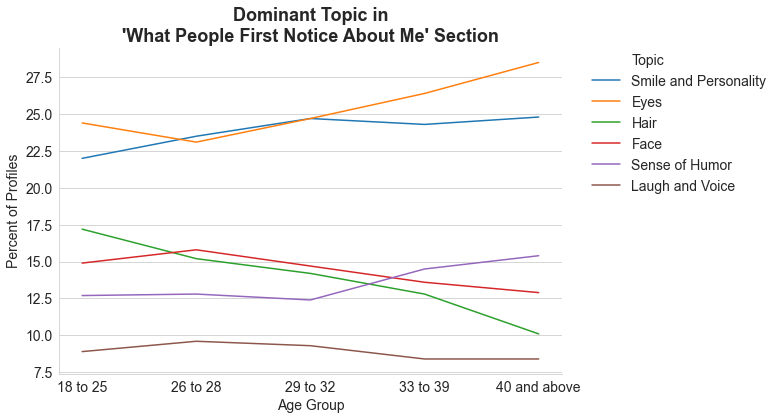

In [36]:
plt.figure(figsize=(9,6))
sns.set_style(style="whitegrid")
ax=sns.lineplot(x=[1,2,3,4,5]*6,y='Value',hue='Topic',data=crosstab)
plt.ylabel('Percent of Profiles',size=14)
plt.xlabel('Age Group',size=14)
plt.title("Dominant Topic in\n'What People First Notice About Me' Section", size=18, fontweight='bold')
xticks=['18 to 25','26 to 28','29 to 32','33 to 39','40 and above']
plt.xticks([1,2,3,4,5],xticks,size=14)
plt.yticks(size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 14},frameon=False)
ax.xaxis.grid()
sns.despine()
plt.savefig('Notice.png',bbox_inches='tight')

In [37]:
scores=unique_terms(X, df_notice, 'bi_age_group')
top=scores.head(10)['scaled_f_score']
bottom=scores.tail(10)['scaled_f_score'].sort_values(ascending=True)

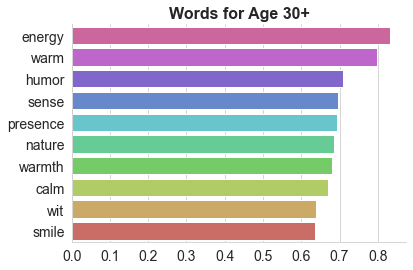

In [38]:
bar_graph(top,'Words for Age 30+','noticeatold.png',True)

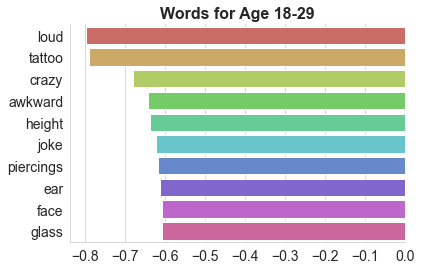

In [39]:
bar_graph(bottom,'Words for Age 18-29','noticeatyoung.png')

In [40]:
df_notice=import_data('firstnotice')
corpus = df_notice['firstnotice']
words_remove=['bay','area','san','francisco','sf','notice','people','im',"i'm",'lol','haha','girl','guy','dude','awesome','crazy','told','beard','mustache','boob','boobs','woman','girly','age']
clean_corpus = cleaning_data(corpus,('N'),words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=50,max_df=1.0, ngram_range=(1,1))
nmf_model = NMF(5,random_state=1)
doc_topic_nmf,_=topic_model(nmf_model, X, terms_per_topic=3)


Topic  1
['smile', 'laugh', 'lot']

Topic  2
['eye', 'blue', 'brown']

Topic  3
['hair', 'color', 'height']

Topic  4
['look', 'thing', 'think']

Topic  5
['sense', 'humor', 'laugh']


In [41]:
scores=unique_terms(X, df_notice, 'sex')
top=scores.head(15)['scaled_f_score']
bottom=scores.tail(15)['scaled_f_score'].sort_values(ascending=True)

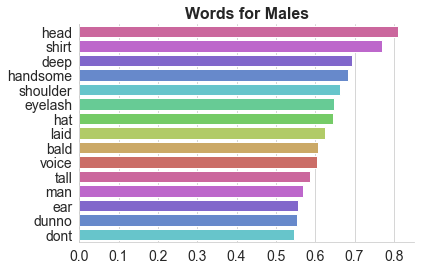

In [42]:
bar_graph(top,'Words for Males','noticemale.png',True)

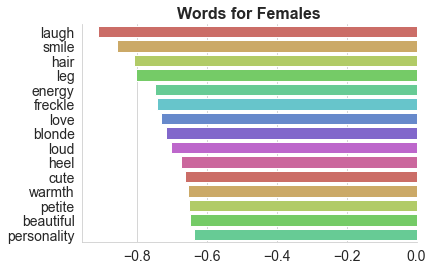

In [43]:
bar_graph(bottom,'Words for Females','noticefemale.png')

## Thinking About

In [44]:
df_think=import_data('thinkingabout')
corpus = df_think['thinkingabout']
words_remove=['bay','area','san','francisco','sf','also','like','spend','think','thinking','lot','time','gonna']
clean_corpus = cleaning_data(corpus,('N','V','J'),words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=25,max_df=1.0, ngram_range=(2,2))
nmf_model = NMF(6,random_state=1)
doc_topic_nmf,_=topic_model(nmf_model, X, terms_per_topic=6)


Topic  1
['travel next', 'want travel', 'go travel', 'place want', 'next go', 'next travel']

Topic  2
['go next', 'next vacation', 'want go', 'next trip', 'next adventure', 'go go']

Topic  3
['make world', 'world place', 'way make', 'life make', 'help make', 'meaning life']

Topic  4
['eat next', 'go eat', 'next meal', 'next trip', 'next adventure', 'next travel']

Topic  5
['friend family', 'next adventure', 'make thing', 'gon na', 'life friend', 'thing make']

Topic  6
['family friend', 'thing want', 'future family', 'thing make', 'next trip', 'work family']


In [45]:
scores=unique_terms(X, df_think, 'sex')
top=scores.head(15)['scaled_f_score']
bottom=scores.tail(15)['scaled_f_score'].sort_values(ascending=True)

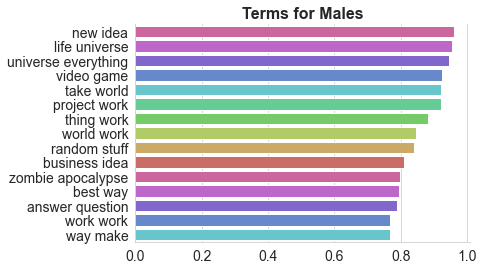

In [47]:
bar_graph(top,'Terms for Males','thinkmale.png',True)

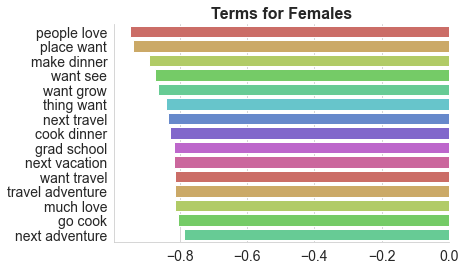

In [48]:
bar_graph(bottom,'Terms for Females','thinkfemale.png')

## Clustering Attempt

Text(0.5, 0, 'K Clusters')

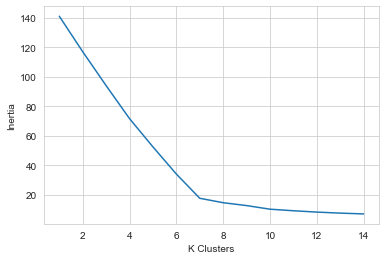

In [50]:
inertia_list=[]
for k in range(1,15):
    km = KMeans(n_clusters=k,random_state=1)
    km.fit(doc_topic_nmf)
    inertia_list.append(km.inertia_)
plt.plot(range(1,15),inertia_list);
plt.ylabel('Inertia')
plt.xlabel('K Clusters')

In [51]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6,random_state=1)
predictions=km.fit_predict(doc_topic_nmf)
unique, counts = np.unique(predictions, return_counts=True)
np.asarray((unique, counts)).T

array([[    0,   432],
       [    1, 34411],
       [    2,   425],
       [    3,   872],
       [    4,   457],
       [    5,   449]])

In [52]:
km.cluster_centers_

array([[0.00275123, 0.00413313, 0.00067224, 0.00224762, 0.00332337,
        0.23331624],
       [0.00365314, 0.00187305, 0.00075227, 0.00172103, 0.00148683,
        0.001793  ],
       [0.00323645, 0.00399459, 0.23947756, 0.00297572, 0.00420642,
        0.00312777],
       [0.00417006, 0.16265697, 0.0004299 , 0.00481635, 0.00121246,
        0.00111962],
       [0.00684032, 0.00476811, 0.0012756 , 0.00302327, 0.20872891,
        0.00072586],
       [0.01230742, 0.00479075, 0.00046133, 0.20658842, 0.00133435,
        0.00207485]])

In [53]:
df_cluster=pd.concat([pd.DataFrame(predictions, columns=['cluster']),df.loc[0:30000,'age_group']],axis=1)
(df_cluster.groupby(['age_group','cluster'])['cluster'].count())/(df_cluster.groupby('age_group')['age_group'].count())*100

age_group       cluster
(17.999, 25.0]  0           1.178567
                1          92.832671
                2           1.274496
                3           2.165273
                4           1.192271
                5           1.356722
(25.0, 28.0]    0           0.987415
                1          92.855760
                2           1.239109
                3           2.458858
                4           1.393998
                5           1.064860
(28.0, 32.0]    0           0.845815
                1          93.198238
                2           0.986784
                3           2.484581
                4           1.356828
                5           1.127753
(32.0, 39.0]    0           1.336851
                1          92.875989
                2           1.248901
                3           2.286719
                4           1.037819
                5           1.213720
(39.0, 69.0]    0           1.149053
                1          93.364622
              

## Pet Wordclouds

In [6]:
df_self_pet = import_data('selfsummary')
df_self_pet = df_self_pet[~(df_self_pet['pet_preference']=='')].reset_index(drop=True)
corpus = df_self_pet['selfsummary']
words_remove=['bay','area','san','francisco','sf','also','like','good','thing','many','ask','think','cat','cats','dog','dogs']
clean_corpus = cleaning_data(corpus,('J','V','N'),words_remove)
X, X_tfidf = vectorize_data(clean_corpus, min_df=10,max_df=.2, ngram_range=(2,2))
nmf_model = NMF(5,random_state=1)
topic_model(nmf_model, X, terms_per_topic=8);


Topic  1
['easy go', 'love travel', 'friend family', 'get know', 'spending time', 'open mind', 'family friend', 'born raise']

Topic  2
['new people', 'meet new', 'look meet', 'love meet', 'new friend', 'enjoy meet', 'make new', 'new place']

Topic  3
['new thing', 'try new', 'learn new', 'love try', 'new restaurant', 'new place', 'explore new', 'love travel']

Topic  4
['look someone', 'someone share', 'find someone', 'make laugh', 'life look', 'someone make', 'want someone', 'someone fun']

Topic  5
['sense humor', 'great sense', 'love laugh', 'humor love', 'fun love', 'sarcastic sense', 'dry sense', 'east coast']


In [7]:
scores=unique_terms(X, df_self_pet, 'pet_preference')
top=scores.head(15)['scaled_f_score']
bottom=scores.tail(15)['scaled_f_score'].sort_values(ascending=True)
bottom_text=np.random.choice(bottom.index,p=(bottom.values/sum(bottom.values)),size=10000)
bottom_text = " ".join(word for word in bottom_text)
top_text=np.random.choice(top.index,p=(top.values/sum(top.values)),size=10000)
top_text = " ".join(word for word in top_text)

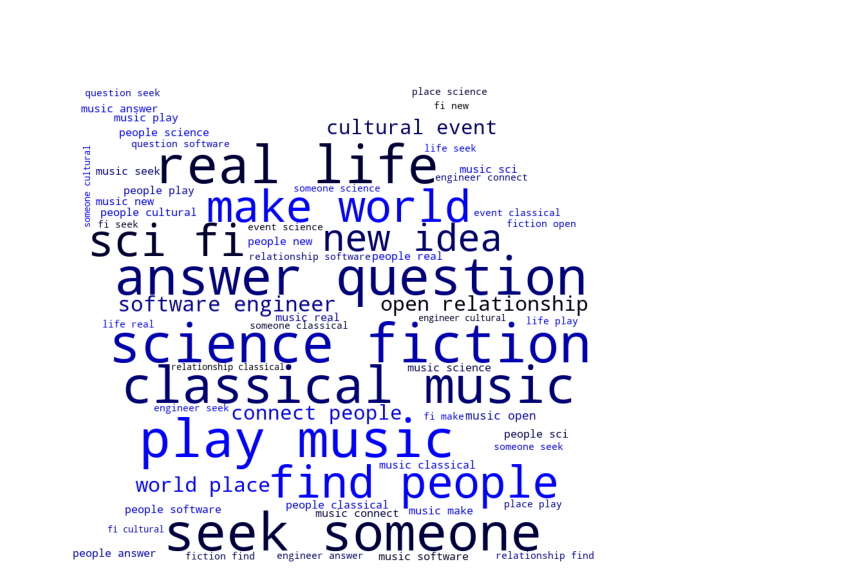

In [58]:
cat_mask = np.array(Image.open("cat3.jpg"))
wordcloud = WordCloud(background_color='white',
                      width=1800,
                      height=1400,
                      mask=cat_mask
            ).generate(bottom_text)
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,200%%, %d%%)" % np.random.randint(0,50))
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('catwordcloud2.png',bbox_inches='tight')

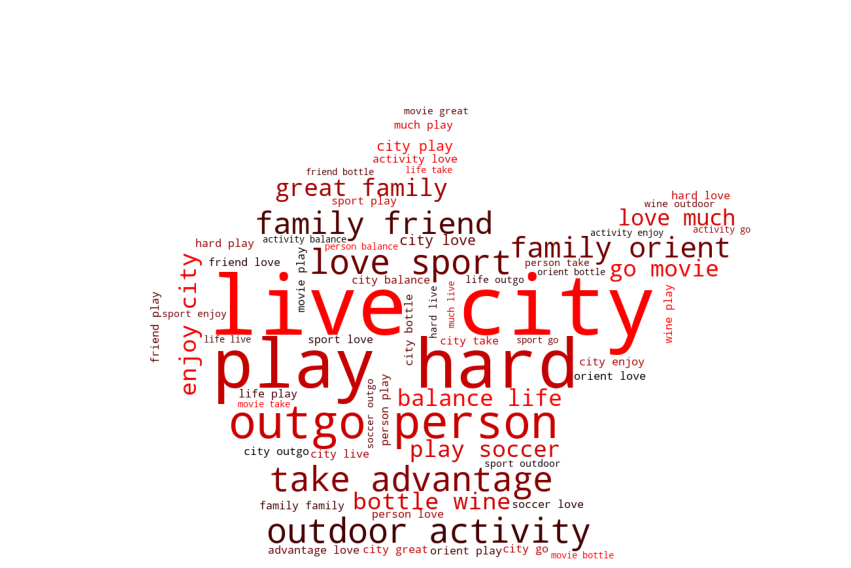

In [8]:
from PIL import Image


cat_mask = np.array(Image.open("Dog9.jpg"))


wordcloud = WordCloud(background_color='white',
                      width=1800,
                      height=1400,
                      mask=cat_mask
            ).generate(top_text)
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(360,120%%, %d%%)" % np.random.randint(0,50))
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('dogwordcloud3.png',bbox_inches='tight')